<a href="https://colab.research.google.com/github/csbfx/apex/blob/main/Answer_Key_APEX_Data_Analysis_of_COVID19_Immune_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://images.pexels.com/photos/4021262/pexels-photo-4021262.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1.jpeg?auto=compress&cs=tinysrgb&dpr=2&w=2300&h=250&fit=crop)

Photo by Anton Uniqueton from Pexels

# Data Analysis with Python Programming: Development of Anti-SARS-CoV-2 Antibody Responses in COVID-19 Patients - KEY
##Class Activity Module
#### Created by Wendy Lee, Akiko Balitactac, Inika Bhatia, Michelle Jin, Jennifer Avena
#### Last updated: June 30, 2023
####Licensed under CC BY-NC-SA

###Learning Objectives:
  1. Summarize and describe data obtained from a scientific dataset.
  2. Interpret data displayed graphically.





---

# **Part 2: Understanding the Dataset**

In [ ]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Read in data file: COVID-19 Inpatient Titer
ip_titer_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/apex/main/data/covid19_Ig_inpatient_titer.csv')

In [ ]:
# Preview data
ip_titer_df

,Patient_ID,Status,Days Post Symptoms Onset,Ig,Absorbance (450nm)
0,3,admit,4,RBD_IgA_Mean,0.03000
1,3,admit,6,RBD_IgA_Mean,0.12900
2,3,admit,5,RBD_IgA_Mean,0.02750
3,3,admit,15,RBD_IgA_Mean,1.68550
4,3,admit,14,RBD_IgA_Mean,1.65250
...,...,...,...,...,...
2098,464,icu,14,RBD_IgM_Mean,0.01800
2099,464,icu,11,RBD_IgM_Mean,0.02275
2100,549,admit,11,RBD_IgM_Mean,0.10685
2101,563,icu,4,RBD_IgM_Mean,0.44375


In [ ]:
# Count unique inpatients
ip_titer_df['Patient_ID'].nunique()

77

## Check-in Questions - Understanding the Dataset


What is the hospital status of patient ID 549?

*   Your Answer: admitted

Why do you see 5 entries for a single patient, ID 3, in the summary table above?

*   Your Answer: Patient ID 3 has multiple entries in the summary table above because samples from this individual patient were collected at multiple different time points.

How many unique inpatients are in this data set?

*   Your Answer: 77


---

## **Part 3: Interpreting a Histogram**

Text(0, 0.5, 'Number of Samples Collected')

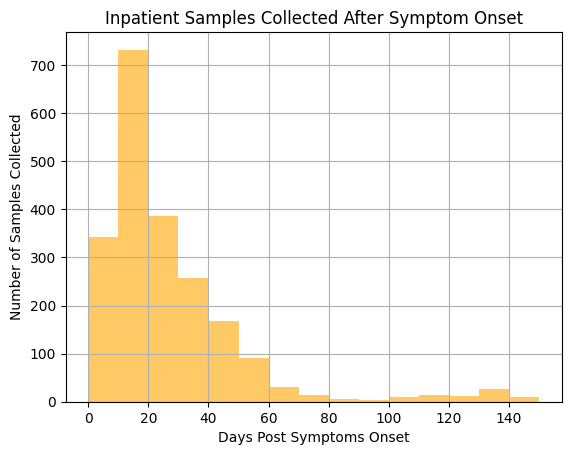

In [ ]:
# Generate histogram
ip_titer_df.hist(column=['Days Post Symptoms Onset'],
                 bins=15, color='orange', alpha=0.6)

# Histogram title
plt.title('Inpatient Samples Collected After Symptom Onset')

# Label x-axis
plt.xlabel('Days Post Symptoms Onset')

# Label y-axis
plt.ylabel('Number of Samples Collected')

Text(0, 0.5, 'Number of Samples Collected')

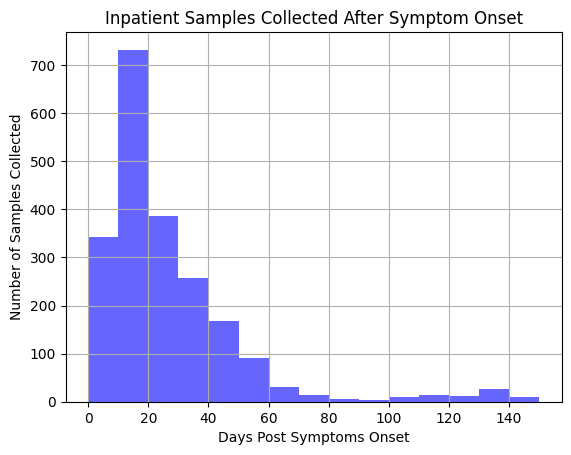

In [ ]:
# Customize the histogram with your color choice
ip_titer_df.hist(column=['Days Post Symptoms Onset'],
                 bins=15, color='blue', alpha=0.6)

# Set your title for the histogram
plt.title('Inpatient Samples Collected After Symptom Onset')

# Label the x-axis with 'Days Post Symptoms Onset'
plt.xlabel('Days Post Symptoms Onset')

# Label the y-axis with 'Number of Samples Collected'
plt.ylabel('Number of Samples Collected')

## Check-in Question - Interpreting a Histogram

What is the general trend of the generated histogram?

*   Your Answer: The general trend of the histogram is right skewed, where the majority of the data is concentrated on the left of the graph, indicating that a larger number of inpatient samples are collected in the earlier days post symptoms onset (around the first two months).


---

## **Part 4: Interpreting a Pie Chart**

In [ ]:
# Filter the data
ip_titer_df[['Patient_ID', 'Status']]

,Patient_ID,Status
0,3,admit
1,3,admit
2,3,admit
3,3,admit
4,3,admit
...,...,...
2098,464,icu
2099,464,icu
2100,549,admit
2101,563,icu


In [ ]:
# Group by patient ID and status (ICU/Admit)
status_df = (ip_titer_df[['Patient_ID', 'Status']]
             .groupby(by=['Patient_ID', 'Status'])
             .mean().reset_index())

# Preview subset
status_df

,Patient_ID,Status
0,3,admit
1,6,icu
2,10,admit
3,14,icu
4,16,icu
...,...,...
72,428,icu
73,449,icu
74,464,icu
75,549,admit


In [ ]:
# Count the occurrences of each patient status
status_counts = status_df['Status'].value_counts().to_frame()

# Display counts
status_counts

,Status
admit,41
icu,36


<Axes: ylabel='Status'>

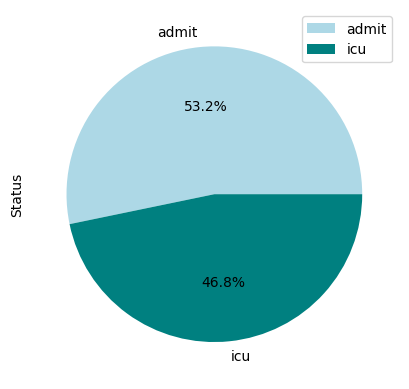

In [ ]:
# Define the colors for the pie chart
palette = ['lightblue','teal']

# Plot the distribution of the patient status
status_counts.plot.pie(y='Status',
                       autopct="%.1f%%", colors=palette)

**Now you try!**  Looking at the example above, write the code to create a new pie chart that compares the percentage of patients with each Ig sample. The code template is provided below; replace the places marked "XXX" with "Ig". You can also choose and customize the pie chart colors! Replace "A", "B", and "C" with colors of your choosing.

* When choosing colors to customize the plots, you can choose any color name from the list of "CSS Colors" [here](https://matplotlib.org/stable/gallery/color/named_colors.html).



<Axes: ylabel='Ig'>

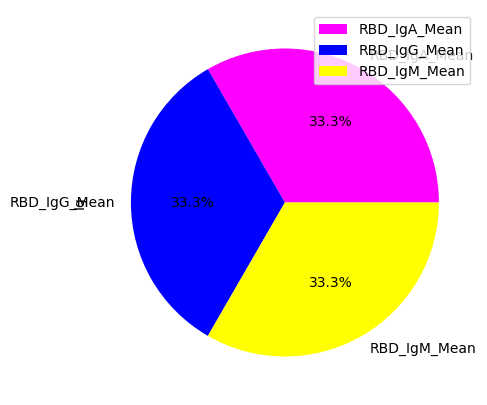

In [ ]:
# Filter the data
ip_titer_df[['Patient_ID', 'Status']]

# Group by patient ID and Ig means variable (IgG, IgM, IgA)
status_df = (ip_titer_df[['Patient_ID', 'Ig']]
             .groupby(by=['Patient_ID', 'Ig'])
             .mean().reset_index())

# Count the occurrences of each patient Ig
status_counts = status_df['Ig'].value_counts().to_frame()

# Set three colors of your choosing
palette = ['magenta','blue','yellow']

# Plot the distribution of the Ig means
status_counts.plot.pie(y='Ig',
                       figsize=(5, 5),
                       autopct="%.1f%%",
                       colors=palette)

## Check-in Question - Interpreting a Pie Chart

Summarize the pie chart that plots the distribution of patient status.

*    Your Answer: The pie chart that plots the distribution of patient status indicates an almost even distribution between those with an "admit" status and those with an "icu" status, with slightly more patients of "admit" status (53.2% v. 46.8%)

Summarize the pie chart that plots the distribution of Ig type.

*    Your Answer: The pie chart that plots the distribution of Ig type is uniformly distributed—there are equal percentages of IgA, IgG, and IgM Mean values in the data table (33.3% - 33.3% - 33.3%).
---

# **Part 5: Interpreting a Dataframe**
## What are the different types of immunoglobin examined in this study?

In [ ]:
# List the unique values in the Ig column
list(ip_titer_df['Ig'].unique())

['RBD_IgA_Mean', 'RBD_IgG_Mean', 'RBD_IgM_Mean']

## What concentration of antibodies against SARS-CoV-2 is detected in the inpatient sample?


In [ ]:
# Descriptive statistics
ip_titer_df['Absorbance (450nm)'].describe()

count    2103.000000
mean        1.099897
std         0.927396
min        -0.055500
25%         0.170350
50%         0.997000
75%         1.782400
max         3.526200
Name: Absorbance (450nm), dtype: float64

## What are the minimum and maximum Days Post Symptoms Onset in the inpatient sample?

In [ ]:
# Paste and edit your code
ip_titer_df['Days Post Symptoms Onset'].describe()

count    2103.000000
mean       26.450785
std        24.493020
min         0.000000
25%        11.000000
50%        19.000000
75%        33.000000
max       150.000000
Name: Days Post Symptoms Onset, dtype: float64

## Check-in Question - Interpreting a Dataframe

What are the minimum and maximum values for Absorbance?  

*    Your Answer: minimum = -0.055500, maximum = 3.526200

What are the mean (i.e., average) and standard deviation (a measure of variation) of the Absorbance values?  Explain what these values mean.

*    Your Answer: mean = 1.099897, standard deviation = 0.927396.  This suggests that there is quite a bit of variability in these values across samples, since the standard deviation value is almost as large as the mean.

What are the minimum and maximum of Days Post Symptom Onset?  

*    Your Answer: The minimum is 0 days and the maximum is 150 days after symptom onset.

---

# **Part 6: Visualizing Data using a Boxplot**

## **Using Boxplots to visualize IgG and IgM Antibody responses over time:**

Text(0.5, 1.05, 'Development of anti-SARS-CoV-2 IgG responses in inpatients over time')

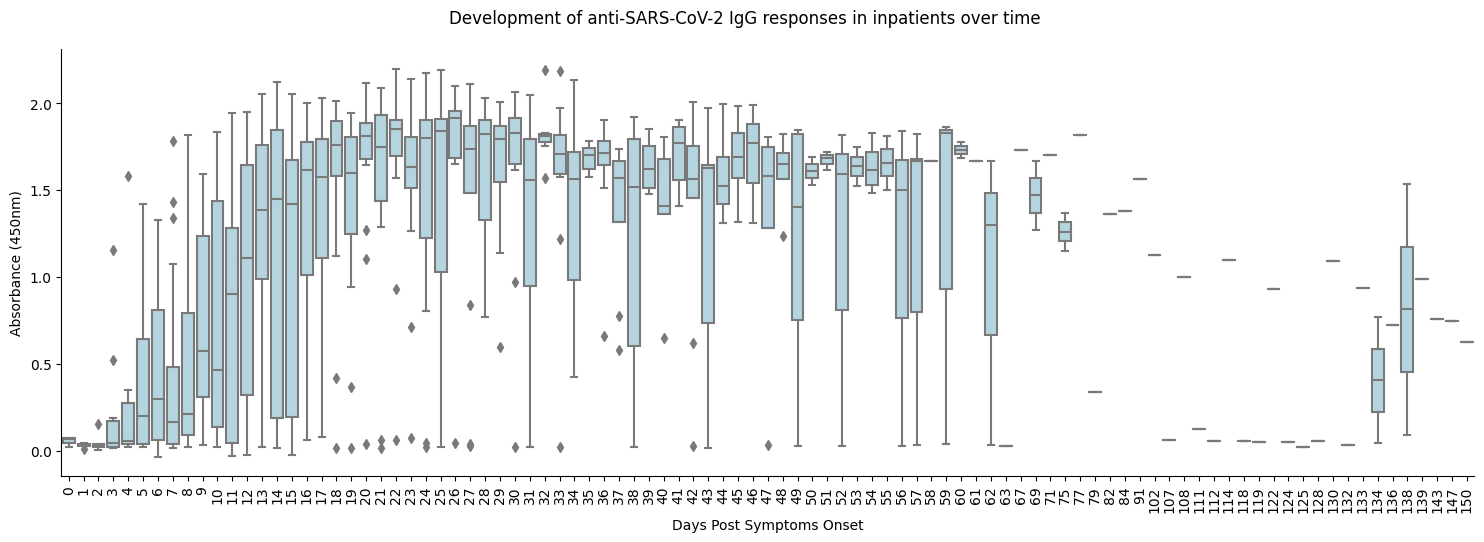

In [ ]:
# Boxplot: Development of anti-SARS-CoV-2 IgG response across time
g=sns.catplot(
    data=ip_titer_df[ip_titer_df.Ig=='RBD_IgG_Mean'],
    x='Days Post Symptoms Onset',
    y='Absorbance (450nm)',
    kind='box',
    aspect=3,
    color='lightblue')

# Rotate x axis label
g.set_xticklabels(rotation=90)

# Designate title and postition
g.fig.suptitle(
    'Development of anti-SARS-CoV-2 IgG responses in inpatients over time',
    y=1.05)

Text(0.5, 1.05, 'Development of anti-SARS-CoV-2 IgM responses in inpatients over time')

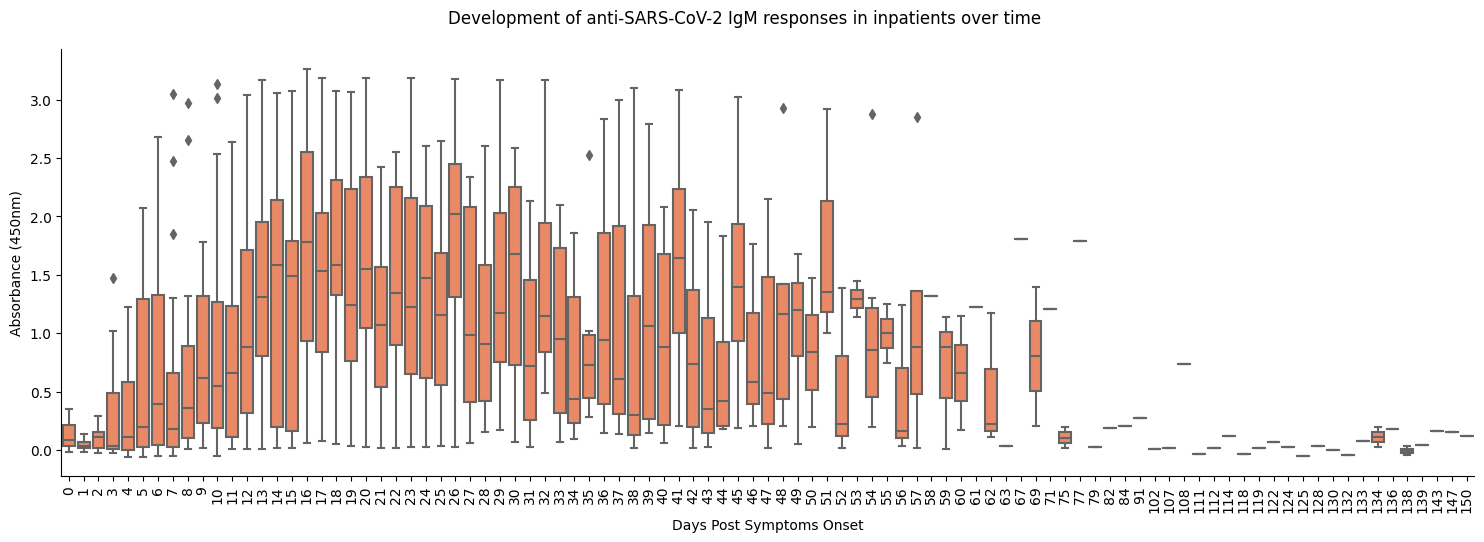

In [ ]:
# Boxplot: Development of anti-SARS-CoV-2 IgM response across time
g=sns.catplot(
    data=ip_titer_df[ip_titer_df.Ig=='RBD_IgM_Mean'],
    x='Days Post Symptoms Onset',
    y='Absorbance (450nm)',
    kind='box',
    aspect=3,
    color='coral')

# Rotate x axis label
g.set_xticklabels(rotation=90)

# Designate title and postition
g.fig.suptitle(
    'Development of anti-SARS-CoV-2 IgM responses in inpatients over time',
    y=1.05)

## Check-in Questions - Understanding the IgG and IgM Boxplots

Using the boxplot, describe the development of IgG responses in inpatients over time.

*    Your Answer: The development of IgG responses in inpatients starts off at low absorbance levels before growing to a period of relatively steady levels around 1.5-2 near the two week mark where it stays similarly until about 2 months post symptom onset.


Using the boxplot, describe the development of IgM responses in inpatients over time.

*    Your Answer: The development of IgM responses in inpatients steadily increases for the first 2 weeks or so post symptoms onset before following an overall trend of decreasing absorbance levels, although fluctuations remain as variability remains high over time.


What general differences do you see between the IgG and IgM boxplots? What do these differences tell you about how the IgG and IgM responses develop over time?

*    Your Answer: In comparison, the IgG boxplots seem to have much less variability (shorter "whiskers") than the IgM boxplots, which indicates that overtime the anti-IgG is developed at more consistent amounts among patients, while the IgM responses are developed with a larger range of variability among patients.  IgM shows a slower decline over time whereas IgG remains high until about 2 months post symptom onset.



---

# **Part 7: Apply Your Programming & Data Analysis Skills!**

# Using a Boxplot to Visualize IgA Antibody response over time


Now that you have had the chance to explore how we can use Python programming to analyze and visualize clinical data, you have the chance to apply your skills in this assignment.

For this part of the activity, you will be analyzing the third Ig: IgA. The code cell below has a template exactly like the ones in the two examples above for IgM and IgG above. Fill in the places marked 'XXX' correctly for IgA. Run the cell below to retrieve the IgA boxplot, and answer the Check-in Questions.



Text(0.5, 1.05, 'Development of anti-SARS-CoV-2 IgA responses in inpatients over time')

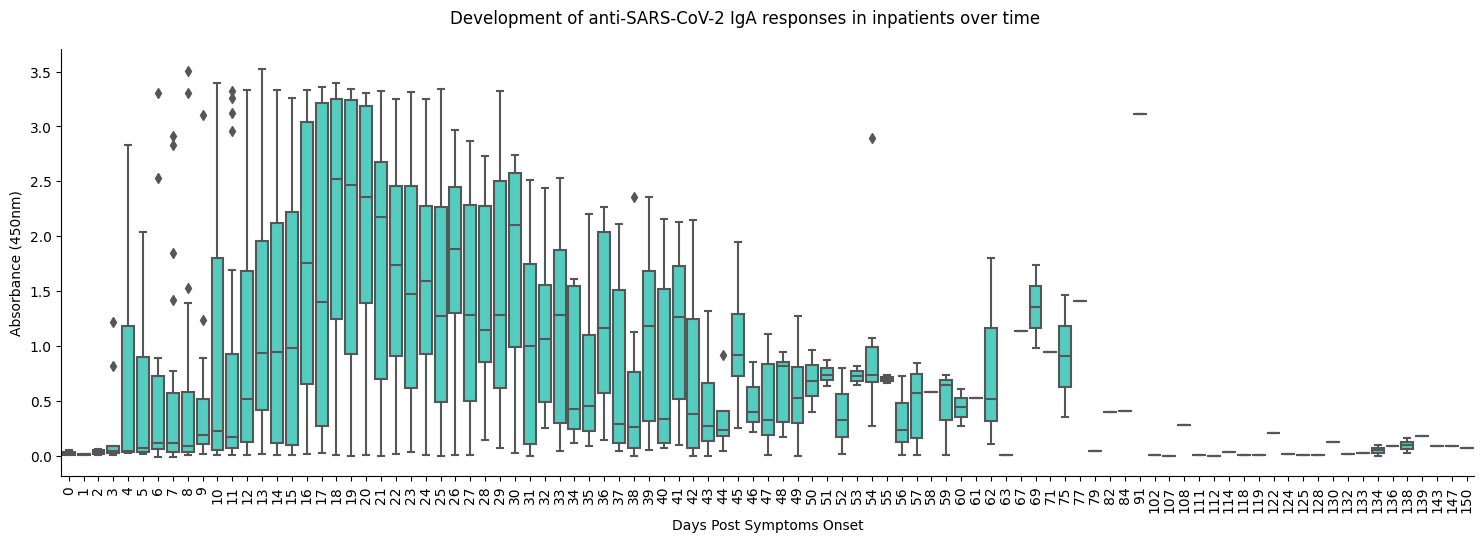

In [ ]:
# Boxplot: Development of anti-SARS-CoV-2 IgA response across time
g=sns.catplot(
    data=ip_titer_df[ip_titer_df.Ig=='RBD_IgA_Mean'],
    x='Days Post Symptoms Onset', # Fill in the x-axis title name
    y='Absorbance (450nm)', # Fill in the y-axis title name
    kind='box', # Fill in 'box' to use box plot
    aspect=3,
    color='turquoise') # Fill in the color of the plot

# Rotate x axis label
g.set_xticklabels(rotation=90)

# Designate title and postition
g.fig.suptitle('Development of anti-SARS-CoV-2 IgA responses in inpatients over time', # Fill in the title of the plot
               y=1.05)

## Check-in Questions - Understanding the IgA Boxplot

Using the boxplot, describe the development of IgA responses in inpatients over time.

*    Your Answer: The development of IgA responses in inpatients overtime follows a trend of increasing steadily in the first 20 or-so days before decreasing steadily until around the 75 day mark when the absorbance levels teeter off.


How does the IgA boxplot compare to the IgG and IgM boxplots?

*    Your Answer: Both IgM an IgA plots reveal higher variability (range of minimum to maximum values) than IgG, generally.  IgA appears to decline slightly more rapidly than the others.



---